---

# Actividad Modulo 2

---

## Importamos librerias necesarias

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.datasets import load_breast_cancer

from NNMultiClass import NNMultiClass, train_test_split_stratified, transform_standardizer, fit_standardizer

%matplotlib inline

---

## Data

In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

---

### Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split_stratified(X, y, test_size=0.2, seed=42)

---

### Scale the data

In [4]:
X_test_scaled  = transform_standardizer(X_test, *fit_standardizer(X_train))
X_train_scaled = transform_standardizer(X_train, *fit_standardizer(X_train))

---

## Neural Network Configuration

In [5]:
input_size = X_test_scaled.shape[1]
output_size = len(np.unique(y))
layers = 64

layer_sizes = [input_size] + [layers] + [output_size]

nn = NNMultiClass(layer_sizes=layer_sizes, hidden_activation="relu", seed=42, lr=3e-1)
nn.show_weights()
y_pred = nn.predict(X_test_scaled)


Pesos capa 0 (30 → 64):
[[ 0.07867761 -0.26852274  0.19376567 ... -0.08646694  0.04202266
   0.15136196]
 [ 0.18363791  0.20484138 -0.09004043 ...  0.09214371  0.37782318
  -0.3069373 ]
 [-0.16518314 -0.23924088 -0.10064846 ...  0.42626776  0.44504858
  -0.04635166]
 ...
 [ 0.0189196   0.00968846 -0.02346277 ...  0.2622049  -0.4281804
  -0.00204094]
 [ 0.0707058  -0.07765708 -0.47822613 ...  0.17353917  0.12267754
  -0.17865651]
 [-0.0435457   0.26949339  0.10156947 ...  0.26474372 -0.08192308
  -0.37856759]]

Pesos capa 1 (64 → 2):
[[-0.13671713  0.12836322]
 [-0.24018807  0.14112389]
 [-0.00688776 -0.14904942]
 [-0.07288938 -0.12715304]
 [ 0.10827815  0.09155348]
 [-0.21489514 -0.05044901]
 [-0.10789821  0.16168875]
 [-0.16876239  0.20052864]
 [-0.00416184 -0.1452418 ]
 [-0.08465927 -0.10020236]
 [-0.1593273   0.01185336]
 [-0.15348944 -0.27254578]
 [-0.04745956 -0.22535702]
 [-0.09402011 -0.11363786]
 [-0.10890201  0.25012039]
 [ 0.00705145  0.03067138]
 [-0.22204979 -0.08174539]
 

---

## Pre - Backpropagation Prediction

---

### Confusion Matrix

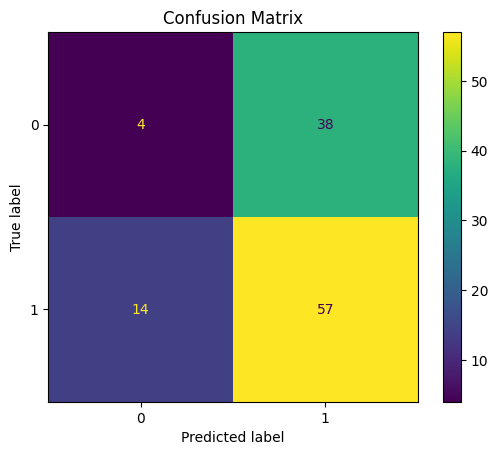

In [6]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

---

### Classification Report

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.10      0.13        42
           1       0.60      0.80      0.69        71

    accuracy                           0.54       113
   macro avg       0.41      0.45      0.41       113
weighted avg       0.46      0.54      0.48       113



---

## Post - Backpropagation Prediction

In [8]:
nn.fit(X_train_scaled, y_train, epochs=100, verbose=True, batch_size=12)
nn.show_weights()
y_pred_back = nn.predict(X_test_scaled)

Epoch    1 | loss=0.0554 | acc=0.9846
Epoch   10 | loss=0.0099 | acc=1.0000
Epoch   20 | loss=0.0038 | acc=1.0000
Epoch   30 | loss=0.0022 | acc=1.0000
Epoch   40 | loss=0.0016 | acc=1.0000
Epoch   50 | loss=0.0012 | acc=1.0000
Epoch   60 | loss=0.0009 | acc=1.0000
Epoch   70 | loss=0.0008 | acc=1.0000
Epoch   80 | loss=0.0007 | acc=1.0000
Epoch   90 | loss=0.0006 | acc=1.0000
Epoch  100 | loss=0.0005 | acc=1.0000

Pesos capa 0 (30 → 64):
[[ 0.09622694 -0.25723934  0.21605229 ... -0.06008279 -0.00423714
   0.07678297]
 [ 0.12223283  0.40444314 -0.03979338 ...  0.01615213  0.29317229
  -0.29366199]
 [-0.16066597 -0.21640794 -0.07026397 ...  0.45476649  0.39857361
  -0.1163985 ]
 ...
 [-0.09277573 -0.13275929  0.04309223 ...  0.35624684 -0.38075124
   0.06115216]
 [-0.00942003 -0.21635012 -0.57632465 ...  0.17194112  0.13268377
  -0.15635763]
 [-0.32113298  0.37388853  0.32452729 ...  0.32392934  0.00314899
  -0.25827847]]

Pesos capa 1 (64 → 2):
[[-3.72316552e-01  3.63962637e-01]
 [-5.7

---

### Confusion Matrix

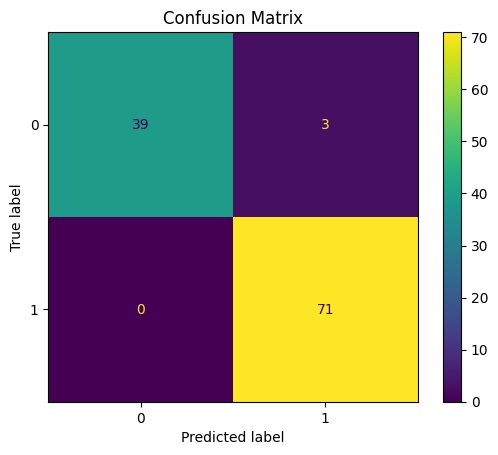

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_back)
plt.title("Confusion Matrix")
plt.show()

---

### Classification Report

In [10]:
print(classification_report(y_test, y_pred_back))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        71

    accuracy                           0.97       113
   macro avg       0.98      0.96      0.97       113
weighted avg       0.97      0.97      0.97       113



---

# Conclusiones

En resumen, el trabajo realizado permitió consolidar aprendizajes clave, demostrar avances técnicos y prácticos, y fortalecer la capacidad de análisis y adaptación. 

Aunque se identificaron áreas de mejora que servirán de guía para el perfeccionamiento futuro, se cuenta ya con una base sólida que permitirá afrontar con mayor claridad y seguridad los retos de las siguientes etapas.

---